<a href="https://colab.research.google.com/github/igorlysov/CP2022/blob/main/demin/notebooks/Intro_CP2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Компьютерный практикум 2022-2023

## Семинар 1. Python для эффективных вычислений

- Python - дирижер компилированного кода

- Средства разработки: `PyCharm`, `Jupyter Notebook` / `Jupyter Lab`

- Как создать быстрый код для решения задачи?

- Массивы: `Numpy`
    
- Компиляция: `Numba`, `Cython`, `F2PY`, `C API`
    
- Измерение времени выполнения `timeit`
    
- Распараллеливание на одной машине: `Numba`, `joblib`, `dask`, `CuPy`
    
- Progress bar (контроль за ходом вычислений): `tqdm`

- Визуализация: `matplotlib`

- Численные методы `Scipy`

- Символьные вычисления `Sympy`


## Оценивание

- Итоговая оценка за курс выставляется по накопленной


- Накопленная формируется из оценок за домашние задания $ДЗ_i$


- Всего $4$ домашних задания, по одному в модуль


- В домашние задания входит $2, 3, 2, 2$ задачи (возможны изменения)


- **Важно! Задачи сложные и содержат большой объем расчетов!**


- Накопленная оценка $НО = 0.13 \cdot ДЗ_1 + 0.29 \cdot ДЗ_2 + 0.29 \cdot ДЗ_3 + 0.29 \cdot ДЗ_4$


- $ДЗ_i$ вычисляется для каждого задания по формулам, указанным в задании, по 100-балльной системе


- $НО = 100$ эквивалентна итоговым $8.49$ баллам (по 10-балльной системе)


- округление - арифметическое: $7.50 \rightarrow 8.0$, $7.49 \rightarrow 7.0$


- $9$ и $10$ итоговых баллов можно получить за *исключительные заслуги*
    - исключительные заслуги оговариваются индивидуально


- **Внимание! Возможность переписать работу не предусмотрена**



## Список тем (возможны изменения)

- Введение
- `Numba` - трансляция и компиляция кода
- `Numpy` - массивы и вычисления
- Перенос тепла
- Прокрустово преобразование, преобразование фурье
- `VisPy` - визуализация на основе `OpenGL`
- `Boids` - взаимодействие независимых агентов
- `Shaders`, `SDF` - двумерная графика, функция расстояния до объекта со знаком
- `Taichi` - библиотека для трансляции и компиляции кода на CPU/GPU
- `Ray marching` - трехмерная графика
- `Diagnosis` - задача о постановке диагноза
- `Runge-Kutta`, `orbits` - интегрирование СОДУ, орбиты
- `SPICE`, карты видимости


#### Установка модулей

In [1]:
!pip install --user numpy scipy matplotlib numba sympy joblib tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Python - дирижер компилированного кода

Давайте взглянем на репозитории таких мощных модулей как:
- [Numpy](https://github.com/numpy/numpy)
- [Scipy](https://github.com/scipy/scipy)
- [Tensorfow](https://github.com/tensorflow/tensorflow)

В каждом из них заметная часть кода написана не на `Python`, а на `C`, `C++`, `Fortran`, `Cython` и/или использует такие мощные математические библиотеки как [`MKL`](https://en.wikipedia.org/wiki/Math_Kernel_Library).

Б$\acute{о}$льшая часть вычислений выполняется благодаря компилированному коду.

Как правило, код `Python` в этих библиотеках нужен для гибкости, удобства и красоты, т.е. для той самой `магии`, благодаря которой многие любят и используют `Python`.

*Схема работы инженера с такими модулями*:

Инженер $\rightarrow$ классный и удобный код `Python` $\rightarrow$ тяжелая жизнь разработчиков библиотек $\rightarrow$ компилированный код, правильно настроенный под задачу инженера $\rightarrow$ быстрый расчет $\rightarrow$ красивый результат в среде `Python` $\rightarrow$ довольный инженер

### Пример

In [2]:
from scipy import optimize
import numpy as np 

def func(x):
  return x*2 + 20*np.sin(x)

r = optimize.minimize(func, 0, method='BFGS')
r

      fun: -23.24167623804531
 hess_inv: array([[0.0502478]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-1.67096375])

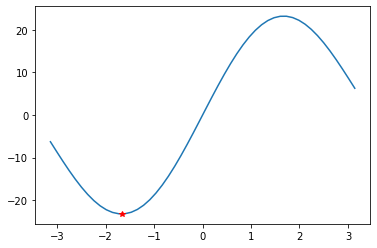

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi)
plt.plot(x, func(x))
plt.plot(r.x, r.fun, 'r*')
plt.show()

### Средства разработки

- [`PyCharm`](https://www.jetbrains.com/community/education/#students) - мощная IDE, в которой есть практически всё, что нужно для разработки; для студентов доступна `Pro` версия бесплатно

- [`Jupyter Notebook`](https://jupyter.org/) - удобная среда для работы с данными, интерактивной работы с кодом, хранения описания, кода и результатов в едином формате

- [`Google Colab`](https://colab.research.google.com) - `Jupyter Notebook` в облаке с доступом к `GPU/TPU`; позволяет запускать код в облаке и не нагружать свой компьютер, но есть ограничения


### Как создать быстрый код для решения задачи?

Постепенное приближение к результату:


1. этап - **прототип**
    1. прототип на `Python` (одна или несколько функций)
    2. проверка корректности результатов расчетов на уменьшенной задаче (~ 1 минуты)


2. этап - **последовательный компилированный код**
    1. модификация или переписывание кода прототипа для компиляции
    2. компиляция кода, основанного на прототипе
    3. проверка корректности результатов расчетов на уменьшенной задаче (~ 1 минуты работы прототипа)
    4. измерение времени работы компилированного кода - нужно ли еще ускорять?
    5. обнаружение медленных мест и их устранение


3. этап - **распараллеливание** (опциональный)
    1. распараллеливание
    2. сравнение результатов расчетов с последовательной версией или прототипом (~ 1 минуты работы последовательной версии или прототипа)


4. этап - **предаврительные расчеты**
    1. выполнение небольшой части расчетов (~5-10%)
    2. контроль корректности результатов
    3. модификация кода, позволяющая сохранять промежуточные результаты


5. этап - **расчеты**
    1. запуск вычислений в полном объёме
    2. контроль корректности результатов
    3. визуализация результатов

### Массивы Numpy

Модуль `Numpy` позволяет эффективно работать с n-мерными массивами. Массивы `Numpy` организованы также, как и массивы в языке `C` и позволяют также быстро работать с ними.

В `Numpy` реализовано:
- создание и преобразование n-мерных массивов
- множество типов элементов, например, `int8`, `uint64`, `float64` и др.
- выбор элементов, срезы, маски
- арифметические операции
- агрегирующие операции
- броадкастинг
- сохранение/загрузка массивов в текстовом/бинарном формате
- линейная алгебра
- преобразование Фурье
- и др.

### Пример

[`Game of Life`](https://github.com/rougier/numpy-tutorial)

The Game of Life, also known simply as Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970. It is the best-known example of a cellular automaton. The "game" is actually a zero-player game, meaning that its evolution is determined by its initial state, needing no input from human players. One interacts with the Game of Life by creating an initial configuration and observing how it evolves.

The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

- Any live cell with fewer than two live neighbours dies, as if by needs caused by underpopulation.

- Any live cell with more than three live neighbours dies, as if by overcrowding.

- Any live cell with two or three live neighbours lives, unchanged, to the next generation.

- Any dead cell with exactly three live neighbours becomes a live cell.


In [5]:
Zarr = np.random.randint(0, 2, (128, 256))
Zarr[:, [0, -1]] = 0
Zarr[[0, -1]] = 0

In [19]:
## подход с классическким Python

def compute_neighbours(Z):
  rows, cols = len(Z), len(Z[0])
  N = [[0 for y in range(cols)] for x in range(rows)]
  for x in range(1, rows-1):
      for y in range(1, cols-1):
          N[x][y] = Z[x-1][y-1] + Z[x][y-1] + Z[x+1][y-1] \
                  + Z[x-1][y]               + Z[x+1][y]   \
                  + Z[x-1][y+1] + Z[x][y+1] + Z[x+1][y+1]
  return N

def iterate(Z):
    rows, cols = len(Z), len(Z[0])
    N = compute_neighbours(Z)
    for x in range(1, rows-1):
        for y in range(1, cols-1):
            if Z[x][y] == 1 and (N[x][y] == 2 or N[x][y] == 3):
                Z[x][y] = 1
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
            else:
                Z[x][y] = 0
    return Z

In [8]:
## подход с Numpy
def iterate_numpy(Z):
  N = (Z[0:-2, 0:-2] + Z[0:-2, 1:-1] + Z[0:-2, 2:] + Z[1:-1, 0:-2] + Z[1:-1, 2:] + Z[2:, 0:-2] + Z[2:, 1:-1] + Z[2:, 2:])
  N3 = N==3
  birth = N3 & (Z[1:-1, 1:-1]==0)
  survive = ((N==2)|N3) & (Z[1:-1, 1:-1]==1)
  Z[...] = 0
  Z[1:-1, 1:-1][birth|survive] = 1
  return Z

In [20]:
Zlst = Zarr.copy()
for i in range(100):
  iterate(Zlst)

In [16]:
Z = Zarr.copy()
for i in range(100):
 iterate_numpy(Z)

In [11]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Text(0.5, 1.05, 'Numpy')

<Figure size 432x288 with 0 Axes>

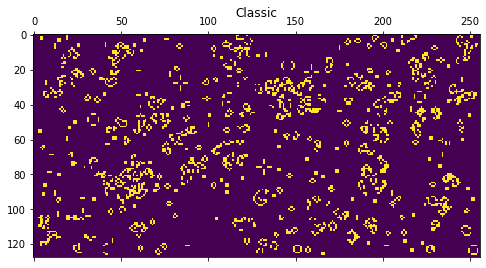

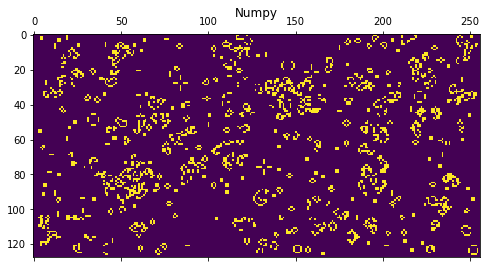

In [21]:
plt.figure()
plt.matshow(Zlst)
plt.title('Classic')
plt.matshow(Z)
plt.title('Numpy')

### Компиляция: **Numba**, Cython, F2PY, C API

Существуют различные подходы для получения быстрого кода для работы с ним в `Python`:

- [`Numba`](http://numba.pydata.org/) - just-in-time компилятор, позволяет писать на `Python` с использованием `Numpy`, а затем компилирует код как если бы он был написан на `C` с использованием математических библиотек

- [`Cython`](https://cython.org/) - диалект `Python`, позволяющий смешивать `Python` и `C` в одном коде и точно контролировать все нюансы. Специалист по `Cython` в МИЭМ - [Буровский Евгений Андреевич](https://www.hse.ru/org/persons/190080844)

- [`F2PY`](https://numpy.org/doc/stable/f2py/) - утилита, являющаяся частью `Numpy` и позволяющая создать интерфейс к `Python` для кода, написанного на `Fortran`

- [`C API`](https://docs.python.org/3/c-api/index.html) - интерпретатор `CPython`, с которым мы работаем, поддерживает интерфейс с языком `C`. Т.е. можно писать и компилировать функции на языке `C`, а потом вручную создавать для них интерфейс к `Python`

- и др.

Мы будем использовать `Numba`, т.к. это позволит в большинстве случаев очень быстро и достаточно просто создавать эффективный код.

### Пример

In [33]:
from numba import njit

def rms(lst):
  r = 0
  n = len(lst)
  for i in range(n):
    r += lst[i] ** 2
  return (r / n) ** 0.5

@njit
def rms_jit(lst):
  return np.sqrt(np.mean(arr ** 2))


In [34]:
arr = np.arange(1e6)
lst = arr.tolist()

In [39]:
rms(lst)

577349.8361765833

In [40]:
rms_jit(lst)

/usr/local/lib/python3.7/dist-packages/numba/core/ir_utils.py:2147: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'lst' of function 'rms_jit'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-33-a08e11e355f1>", line 11:
@njit
def rms_jit(lst):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


577349.8361765833

### Измерение времени выполнения

- `time`
- `timeit`
- %%timeit, %timeit, %%time, %time
- profilers

#### Однократное измерение

In [45]:
from time import time

In [46]:
t = time()
rms(arr)
print(time() - t, 's')

0.42930102348327637 s


In [47]:
t = time()
rms_jit(arr)
print(time() - t, 's')

0.14891839027404785 s


#### Многократное измерение

In [53]:
from timeit import timeit

In [54]:
n = 10
timeit('rms_jit(arr)', number=n, globals=globals()) / n

0.004158884999969814

#### IPython `%magic`

In [55]:
%%timeit
rms_jit(arr)

3.42 ms ± 181 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [56]:
%%time 
rms(arr)

CPU times: user 767 ms, sys: 1.77 ms, total: 769 ms
Wall time: 1.23 s


577349.8361765833

### Распараллеливание на одной машине: Numba, joblib, dask

- [`Numba`]() позволяет автоматически:
    - распараллеливать циклы с независимыми итерациями, иногда со слабо зависимыми (только threads)
    - использует инструкции SSE, AVX для SIMD-распараллеливания
    
- [`joblib`](https://joblib.readthedocs.io/en/latest/) позволяет:
    - распараллеливать вычисления на уровне отдельных задач (`task farming`)
    - использует потоки или процессы
    
- [`dask`](https://dask.org/) позволяет:
    - распараллеливать `Numpy`-вычисления (алгоритмы на многомерных массивах)
    - распараллеливать как локально, так и на кластер
    - обрабатывать большие массивы данных, не загружая их полностью в ОЗУ
    
- [`CuPy`](https://docs.cupy.dev/en/stable/index.html):
    - мимикрирует под `Numpy`
    - позволяет выполнять вычисления на `GPU`
    - писать пользовательские ядра на `Python` и `C`

### Пример

In [57]:
from joblib import Parallel, delayed

In [58]:
@delayed
def calc(data):
  print('real calculation')
  return np.linalg.svd(data)

In [59]:
arr = np.random.rand(50, 1000, 1000)

In [60]:
result = Parallel(n_jobs=4, verbose=1)(calc(x) for x in arr)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   33.8s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   38.1s finished


In [61]:
del arr

### Progress bar (контроль за ходом вычислений)

Различные инструменты описаны в хорошем обзоре: [Отслеживаем прогресс выполнения в Python](https://habr.com/ru/post/483400/)

Рассмотрим два варианта:
- вывод номера итерации - не требует никаких специальных инструментов
- модуль `tqdm` - очень прострой в использовании и универсальный

### Численные методы

Библиотека [`Scipy`](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html#user-guide) предоставляет множество готовых эффективных алгоритмов численных методов:
- интегрирование, в том числе ОДУ
- оптимизация
- интерполяция
- преобразование Фурье
- обработка сигналов
- линейная алгебра
- разреженные матрицы
- статистика
- и др.

### Пример

[Примеры ядер свертки](https://robocraft.ru/blog/computervision/427.html)

[Типы ядер свертки](https://www.machinelearningmastery.ru/types-of-convolution-kernels-simplified-f040cb307c37/)

### Задание

Применить другие ядра и визуализировать результат

### Символьные вычисления

Библиотека [`Sympy`](https://www.sympy.org/en/index.html) предоставляет инстументы для символьных вычислений


### Задание

Реализовать функцию `df`, используя операции `Numpy` и сравнить время вычислений с `dfn`